In [16]:
# taking environmental, lgbt as criteria to decide which country is in predefined, i.e. vote 1 or 0 regardless of neighbors

import os
root = os.path.dirname(os.getcwd())

import pandas as pd
import numpy as np

os.chdir(os.path.join(root, "src", "utils"))
from aka import tri2aka, tri2name, guess_country
os.chdir(os.path.join(root, "src"))

In [17]:
# read covotes and contravotes data
df_covotes = pd.read_csv(os.path.join(root, "constructed_network", "covotes.csv"), index_col=0)
df_contravotes = pd.read_csv(os.path.join(root, "constructed_network", "contravotes.csv"), index_col=0)
df_alliances = pd.read_csv(os.path.join(root, "constructed_network", "alliances.csv"), index_col=0)
countries = df_covotes.columns

covotes = df_covotes.to_numpy()
contravotes = df_contravotes.to_numpy()

rows, cols = covotes.shape

Text(0.5, 1.0, 'Covotes with Percentiles')

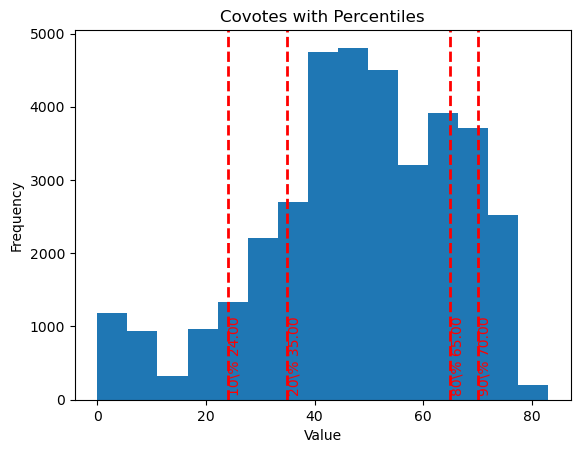

In [18]:
import matplotlib.pyplot as plt

percentiles_to_draw = [10, 25, 75, 90]
percentiles_to_draw = [10, 20, 80, 90]

percentiles = np.percentile(covotes, percentiles_to_draw)
covotes_percentiles = dict(zip(percentiles_to_draw, percentiles))

# Add vertical lines and annotations for percentiles
for i, p in enumerate(percentiles):
    plt.axvline(p, color='r', linestyle='--', linewidth=2)
    plt.text(p, 50, f'{percentiles_to_draw[i]}\% {p:.2f}', color='r', rotation=90, verticalalignment='bottom')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(covotes.flatten(), bins=15)
plt.title('Covotes with Percentiles')



Text(0.5, 1.0, 'Contravotes with Percentiles')

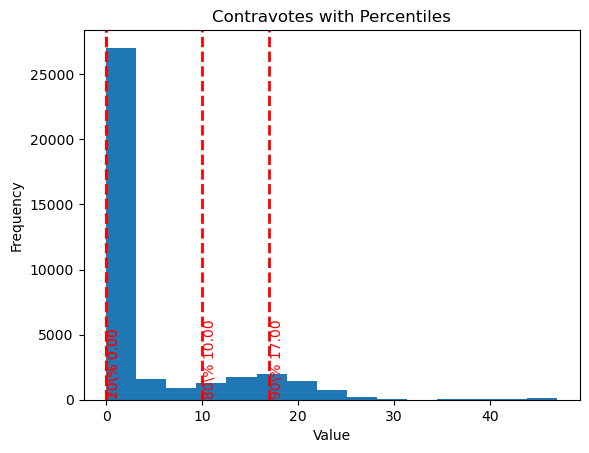

In [19]:
import matplotlib.pyplot as plt

percentiles_to_draw = [10, 25, 75, 90]
percentiles_to_draw = [10, 20, 80, 90]

percentiles = np.percentile(contravotes, percentiles_to_draw)
contravotes_percentiles = dict(zip(percentiles_to_draw, percentiles))


# Add vertical lines and annotations for percentiles
for i, p in enumerate(percentiles):
    plt.axvline(p, color='r', linestyle='--', linewidth=2)
    plt.text(p, 50, f'{percentiles_to_draw[i]}\% {p:.2f}', color='r', rotation=90, verticalalignment='bottom')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(contravotes.flatten(), bins=15)
plt.title('Contravotes with Percentiles')



In [20]:
df_covotes_over80 = df_covotes.applymap(lambda x: 1 if x >= covotes_percentiles[80] else 0)
df_covotes_over90 = df_covotes.applymap(lambda x: 1 if x >= covotes_percentiles[90] else 0)

df_covotes_under20 = df_covotes.applymap(lambda x: 1 if x <= covotes_percentiles[20] else 0)
df_covotes_under10 = df_covotes.applymap(lambda x: 1 if x <= covotes_percentiles[10] else 0)

df_contravotes_under20 = df_contravotes.applymap(lambda x: 1 if x <= contravotes_percentiles[20] else 0)
df_contravotes_under10 = df_contravotes.applymap(lambda x: 1 if x <= contravotes_percentiles[10] else 0)

df_contravotes_over80 = df_contravotes.applymap(lambda x: 1 if x >= contravotes_percentiles[80] else 0)
df_contravotes_over90 = df_contravotes.applymap(lambda x: 1 if x >= contravotes_percentiles[90] else 0)

In [21]:
"df_covotes_over75 df_covotes_over90 df_covotes_under25 df_covotes_under10 df_contravotes_under25 df_contravotes_under10 df_contravotes_over75 df_contravotes_over90".replace("75", "80").replace("25", "20")

'df_covotes_over80 df_covotes_over90 df_covotes_under20 df_covotes_under10 df_contravotes_under20 df_contravotes_under10 df_contravotes_over80 df_contravotes_over90'

In [22]:
df_covotes.to_csv(os.path.join(root, "constructed_network", "cocontravotes", "covotes.csv"))
df_contravotes.to_csv(os.path.join(root, "constructed_network", "cocontravotes", "contravotes.csv"))

for df_name in 'df_covotes_over80 df_covotes_over90 df_covotes_under20 df_covotes_under10 df_contravotes_under20 df_contravotes_under10 df_contravotes_over80 df_contravotes_over90'.split(' '):
    exec(f"{df_name}.to_csv(os.path.join(root, 'constructed_network', 'cocontravotes', '{df_name[3:]}.csv'))")